In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\AMAN\OneDrive\Desktop\python ml\Datasets\Social_Network_Ads.csv")

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
106,26,35000,0
46,25,79000,0
180,26,16000,0
339,39,122000,1
172,26,118000,0


## Train test split

In [5]:
# 1. Features (X) banaye -> "Purchased" column hata do
X = df.drop('Purchased', axis=1)

# 2. Target (y) banaye -> sirf "Purchased" column lo
y = df['Purchased']

# 3. Train-test split karo (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3,   # 30% data test ke liye
    random_state=0  # same split har run me
)

# 4. Shapes check karlo (optional)
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (280, 2)
X_test shape : (120, 2)
y_train shape: (280,)
y_test shape : (120,)


In [6]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [7]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform dono honge test bhi train data bhi
X_train_scaled = scaler.transform(X_train)    #each Xi is replaced by (Xi - mean)/standard deviation
X_test_scaled = scaler.transform(X_test)

In [8]:
#dono ka mean dega
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train_scaled  #abhi numpy array dega

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [10]:
#converting to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

#after scaling wala dega
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [11]:
#comparing original dataset and scaled dataset
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,280.0,37.864286,10.218201,18.0,30.0,37.0,46.0,60.0
EstimatedSalary,280.0,69807.142857,34641.201654,15000.0,43000.0,70500.0,88000.0,150000.0


In [12]:
#the scaled dataframe have 0 mean and 1 standard deviation
np.round(X_train_scaled.describe().T,1)   #rounding off the values for better understanding

,count,mean,std,min,25%,50%,75%,max
Age,280.0,0.0,1.0,-1.9,-0.8,-0.1,0.8,2.2
EstimatedSalary,280.0,0.0,1.0,-1.6,-0.8,0.0,0.5,2.3


Text(0.5, 1.0, 'AFTER SCALING')

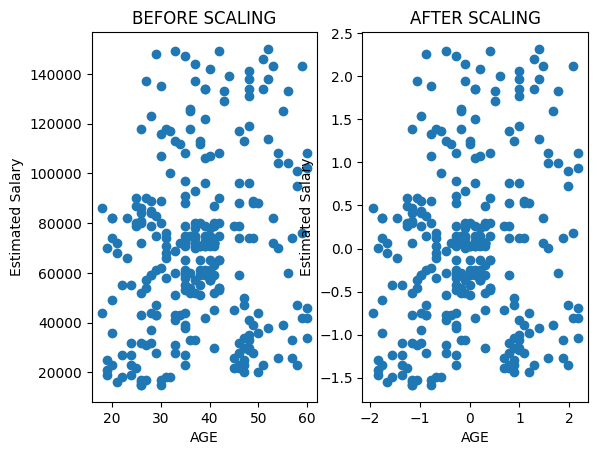

In [ ]:
#plot using matplotlib
x1 = X_train['Age']
y1 = X_train['EstimatedSalary']

plt.subplot(1,2,1) #1 row, 2 column, 1 row
plt.scatter(x1,y1,marker= 'o')
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.title("BEFORE SCALING")

x2 = X_train_scaled['Age']
y2 = X_train_scaled['EstimatedSalary']
plt.subplot(1,2,2)
plt.scatter(x2,y2,marker= 'o')
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.title("AFTER SCALING")


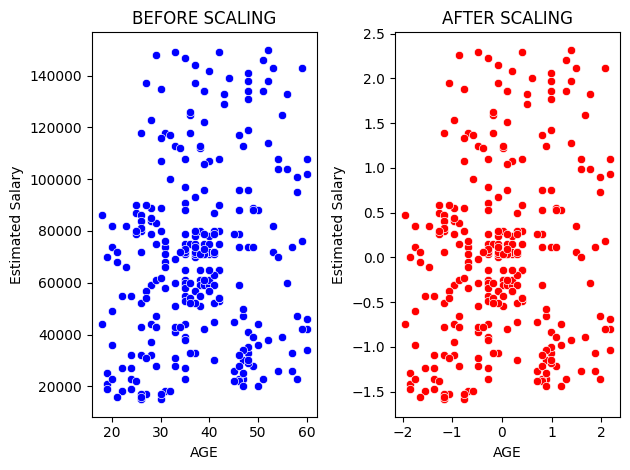

In [ ]:
#plotting using seaborn 
# Before scaling
x1 = X_train['Age']
y1 = X_train['EstimatedSalary']

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.scatterplot(x=x1, y=y1, marker='o', color='blue')
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.title("BEFORE SCALING")

# After scaling
x2 = X_train_scaled['Age']
y2 = X_train_scaled['EstimatedSalary']

plt.subplot(1, 2, 2)  # second subplot
sns.scatterplot(x=x2, y=y2, marker='o', color='red')
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.title("AFTER SCALING")

plt.tight_layout()
plt.show()


In [ ]:
#the standardization is useful in linear regression, KNN, KMeans,PCA,Gradient ddescent like algorithms improves performance metrics and results
# not effects in case of decision tree ,if outliers in columns 